Quantum Leadership Training Program 2025
# Bits, gates, and circuits

Kifumi Numata, IBM Quantum (Nov 18, 2025)

### Table of Contents
- 1. Signle-qubit quantum gates    
    - Exercise 1 - Build single-qubit circuits
- 2. Multi-qubit quantum gates    
- 3. Preparation for execution on a real quantum device
- 4. Run on a real quantum device by following Qiskit Patterns
    - Exercise 2 - Build two-qubit circuits
- 5. GHZ state
    - Exercise 3 - Build the shallowest circuits

You can run the cell by "Shift" + "Enter".

In [ ]:
# Required packages for Google Colab
#%pip install qiskit[visualization] qiskit-aer qiskit-ibm-runtime

In [ ]:
# See the version of Qiskit
import qiskit
qiskit.__version__

## 1. Single-qubit quantum gates

### Preparing the quantum circuit

In [ ]:
from qiskit import QuantumCircuit

# Create the single-qubit quantum circuit
qc = QuantumCircuit(1)

# Draw the circuit
qc.draw(output="mpl")

### X gate

In [ ]:
qc = QuantumCircuit(1)    # Prepare the single-qubit quantum circuit

# Apply a X gate to qubit 0
qc.x(0)

# Draw the circuit
qc.draw(output="mpl")

In IBM Quantum, the initial state is set to $|0\rangle$, so the quantum circuit above in matrix representation is

$X|0\rangle=  \begin{pmatrix}
0 & 1 \\\
1 & 0
\end{pmatrix}
\begin{pmatrix}
1 \\\
0
\end{pmatrix}
 =\begin{pmatrix}
0 \\\
1
\end{pmatrix} = |1\rangle$

Next, let's see the state vector of this circuit. Vertical vector is displayed as row vector, with complex numbers (the imaginary part is indexed by j ).

In [ ]:
from qiskit.quantum_info import Statevector

sv = Statevector(qc)
print(sv)

You can also see it on the Bloch sphere.

In [ ]:
from qiskit.visualization import plot_bloch_multivector

plot_bloch_multivector(sv)

### H gate

In [ ]:
qc = QuantumCircuit(1)    # Create the single-qubit quantum circuit

# Apply an Hadamard gate to qubit 0
qc.h(0)

# Draw the circuit
qc.draw(output="mpl")

In [ ]:
sv = Statevector(qc)
print(sv)
plot_bloch_multivector(sv)

This is $H|0\rangle= \frac{1}{\sqrt{2}} \begin{pmatrix}
1 & 1 \\\
1 & -1
\end{pmatrix}
\begin{pmatrix}
1 \\\
0
\end{pmatrix}
 =\frac{1}{\sqrt{2}}\begin{pmatrix}
1 \\\
1
\end{pmatrix}
=\begin{pmatrix}
0.707 \\\
0.707
\end{pmatrix}
=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) = |+\rangle $.




By applying the $H$ gate on the $|0\rangle$, we can create a superposition of $|0\rangle$ and $|1\rangle$ where measurement would give you each state with equal probabilities.

### $|-\rangle$ state

In [ ]:
qc = QuantumCircuit(1)    # Create the single-qubit quantum circuit

# Apply a X gate to qubit 0
qc.x(0)

# Apply an Hadamard gate to qubit 0
qc.h(0)

# draw the circuit
qc.draw(output="mpl")

In [ ]:
sv = Statevector(qc)
print(sv)
plot_bloch_multivector(sv)

This is

$H|1\rangle= \frac{1}{\sqrt{2}} \begin{pmatrix}
1 & 1 \\\
1 & -1
\end{pmatrix}
\begin{pmatrix}
0 \\\
1
\end{pmatrix}
 =\frac{1}{\sqrt{2}}\begin{pmatrix}
1 \\\
-1
\end{pmatrix}
=\begin{pmatrix}
0.707 \\\
-0.707
\end{pmatrix}
=\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle) = |-\rangle$



Applying the $H$ gate on $|1\rangle$ results in an equal superposition of $|0\rangle$ and $|1\rangle$, but the sign of $|1\rangle$ is negative.

### Typical single-qubit gates
Let's try different gates.

In [ ]:
import numpy as np

qc = QuantumCircuit(1)

# Pauli gates
qc.x(0)
# qc.y(0)
# qc.z(0)

# Rotation gates - specify the rotation angle and qubit number
# qc.rx(np.pi, 0)
# qc.ry(np.pi, 0)
# qc.rz(np.pi, 0)

# Hadamard gate
# qc.h(0)

# draw the circuit
qc.draw(output="mpl")

# Draw a Bloch sphere
plot_bloch_multivector(Statevector(qc))

## Exercise 1

Build the following quantum circuit and run it by `Statevector` and display the Bloch sphere.

(1) $XX|0\rangle$

(2) $HH|0\rangle$  

(3) $HZH|0\rangle$
    
To add a new cell, select the "+" at the top or press "B" on the keyboard.

In [ ]:
### (1) XX|0> ###

# Create the single-qubit quantum circuit
qc = ##your code goes here##

# Add a X gate to qubit 0
qc. ##your code goes here##

# Add a X gate to qubit 0
qc. ##your code goes here##

# Draw a circuit
qc.draw(output="mpl")

In [ ]:
sv = Statevector(qc)
print(sv)
plot_bloch_multivector(sv)

In [ ]:
### (2) HH|0> ###
##your code goes here##



qc.draw("mpl")

In [ ]:
sv = Statevector(qc)
print(sv)
plot_bloch_multivector(sv)

In [ ]:
### (3) HZH|0> ###
##your code goes here##



qc.draw("mpl")

In [ ]:
sv = Statevector(qc)
print(sv)
plot_bloch_multivector(sv)

## 2. Multi-qubit quantum gates
### two-qubit quantum circuit
We can create a two-qubit quantum circuit with following code. We will apply an $H$ gate to each qubit.

In [ ]:
# Create the two qubits quantum circuit
qc = QuantumCircuit(2)

# Apply an H gate to qubit 0
qc.h(0)

# Apply an H gate to qubit 1
qc.h(1)

# Draw the circuit
qc.draw(output="mpl")

In [ ]:
sv = Statevector(qc)
print(sv)

The quantum state of the above circuit can be written as a tensor product of single-qubit quantum state.

$|q0\rangle \otimes|q1\rangle = (a|0\rangle+b|1\rangle) \otimes (c|0\rangle+d|1\rangle) $

$= ac|0\rangle|0\rangle+ad|0\rangle|1\rangle+bc|1\rangle|0\rangle+bd|1\rangle|1\rangle$

$= ac|00\rangle+ad|01\rangle+bc|10\rangle+bd|11\rangle$

($|ac|^2+ |ad|^2+ |bc|^2+ |bd|^2=1$ )


The initinal state of Qiskit is $|0\rangle|0\rangle=|00\rangle$, so by applying $H$ to each qubit, it changes to a state of equal superposition.

$H|0\rangle \otimes H|0\rangle=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) \otimes \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) = \frac{1}{2}(|00\rangle+|01\rangle+|10\rangle+|11\rangle)$

$$
=\frac{1}{2}\left( \begin{bmatrix} 1 \\ 1 \end{bmatrix} \otimes \begin{bmatrix} 1 \\ 1 \end{bmatrix}\right) = \frac{1}{2}\begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \end{bmatrix}=\frac{1}{2}\left(\begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}+\begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix}+\begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \end{bmatrix}+\begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \end{bmatrix}\right)
$$


### Qiskit bit ordering

Qiskit uses **Little Endian** notations for qubits and bits ordering, meaning **qubit 0 is the rightmost bit** in the bitstrings. Example: $|01\rangle$ means q0 is $|1\rangle$ and q1 is $|0\rangle$. Be careful because most of the literature in quantum computing use the Big Endian notation (qubit 0 is the leftmost bit).




Another thing to notice is that when representing a quantum circuit, in both cases $|q_0\rangle$ is written at the top of the circuit.


In [ ]:
# Draw a Bloch sphere
plot_bloch_multivector(sv)

### Typical two-qubit gates
Let's try different two-qubit gates.

In [ ]:
qc = QuantumCircuit(2)

# Control-Pauli gates - Spcify control bit and target bit
qc.cx(0, 1)
# qc.cy(0, 1)
# qc.cz(0, 1)

# Control-Rotation gates - Spcify rotation angle, control bit, and target bit
# qc.crx(np.pi, 0, 1)
# qc.cry(np.pi, 0, 1)
# qc.crz(np.pi, 0, 1)

# draw the circuit
qc.draw(output="mpl")

### Qiskit Aer Simulator
Next, let's measure this circuit. We need to define the classical registers and add the measuremetn gates.

In [ ]:
# Create a new circuit with two qubits (first argument) and two classical bits (second argument)
qc = QuantumCircuit(2,2)

# Apply the gates
qc.h(0)
qc.h(1)

# Add the measurement gates
qc.measure(0,0)    # Measure qubit 0 and save the result in bit 0
qc.measure(1,1)    # Measure qubit 1 and save the result in bit 1

# Draw the circuit
qc.draw(output="mpl")

With the measurements, we are now ready to run our circuit on a Aer simulator. In this example, we will apply shots=1024, which means we will measure 1024 times. Then we will plot those counts in a histograpm.

In [ ]:
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import Sampler

# Run the circuit on a simulator to get the results
backend = AerSimulator()
sampler = Sampler(backend)
job = sampler.run([qc])
result = job.result()

# Print the results
counts = result[0].data.c.get_counts()
print(counts)

# Plot the counts in a histogram
from qiskit.visualization import plot_histogram
plot_histogram( counts )

As expected, the states $|00\rangle$, $|01\rangle$, $|10\rangle$, $|11\rangle$ were measured almost 25% each.

## 3. Preparation for execution on a real quantum device

To experiment with a real quantum computer, enter the API key and CRN in the code of the following cell as follows:

1. Sign in to https://quantum.cloud.ibm.com/ and click "Create +" next to "API key" on the left.
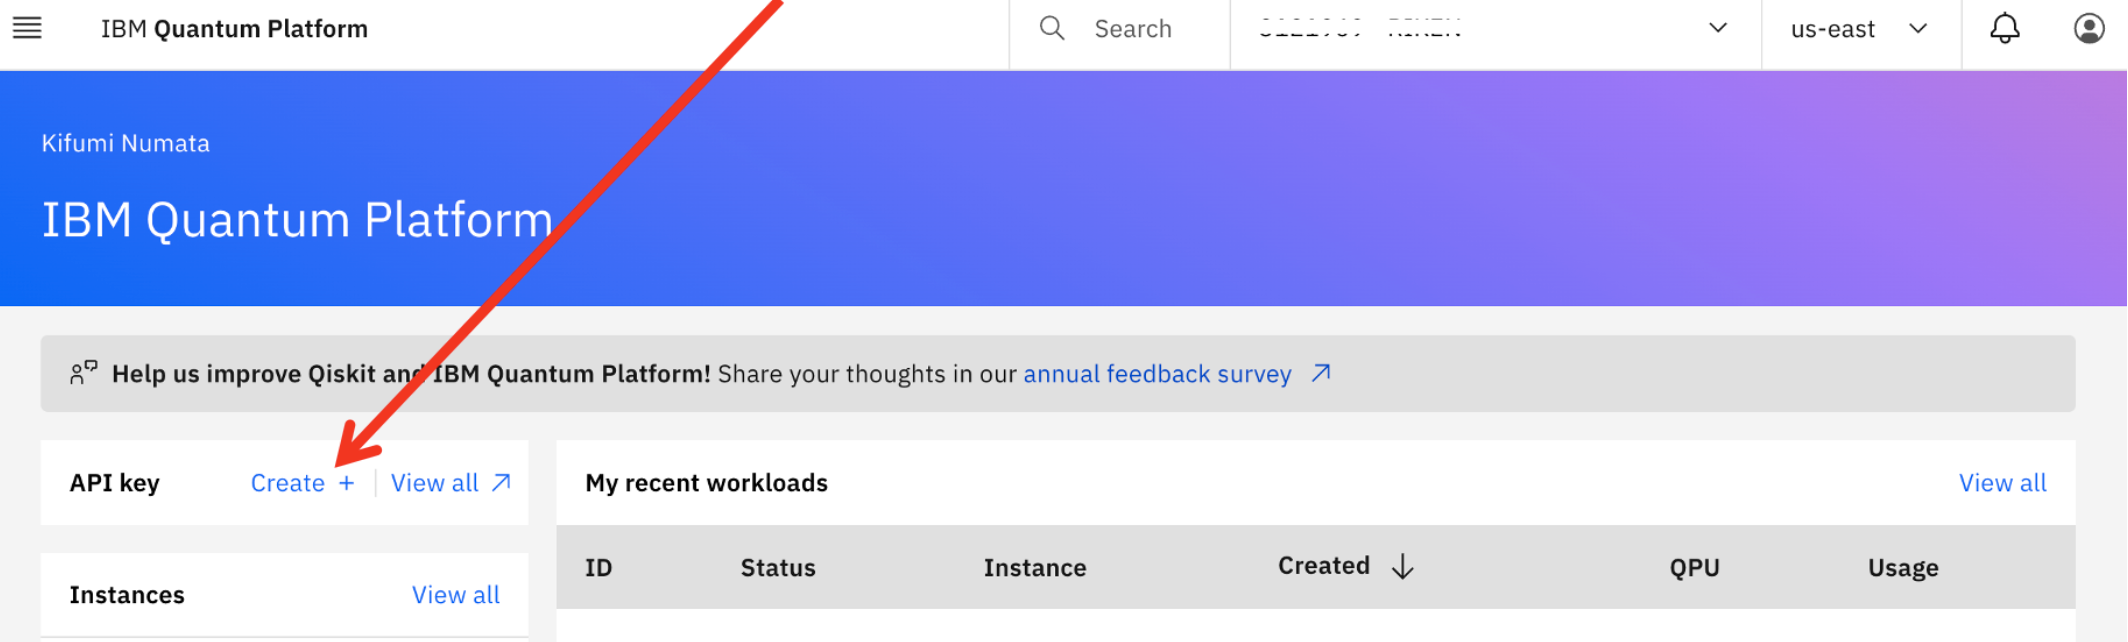

2. Enter the name of your API key (e.g., my API) and click "Create".
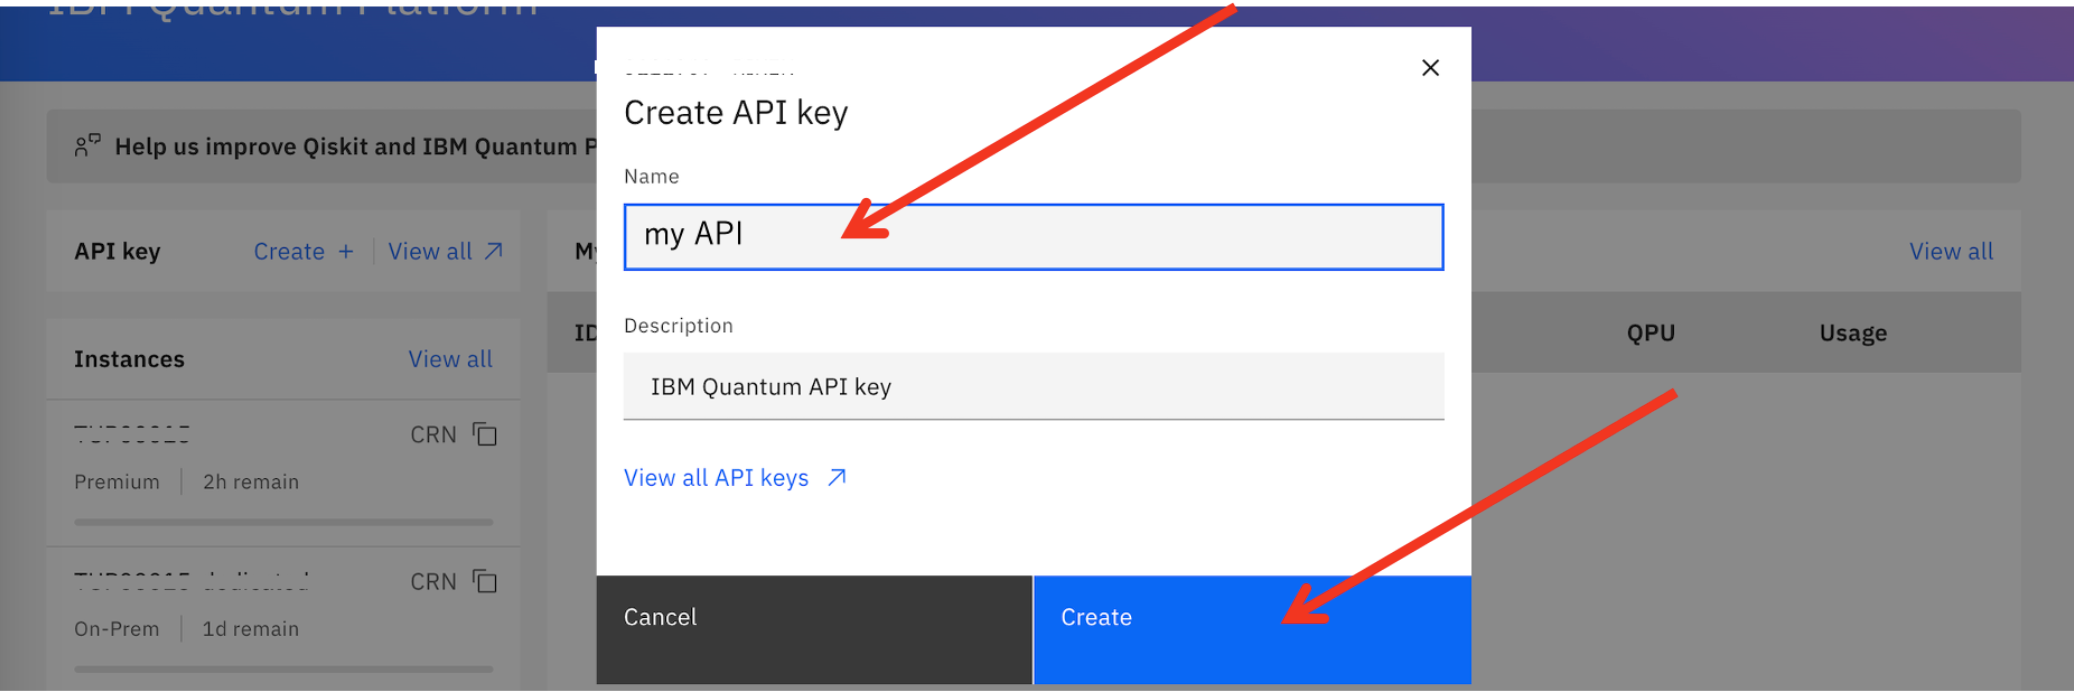

3. Click "Download" to save the "apikey.json" file.
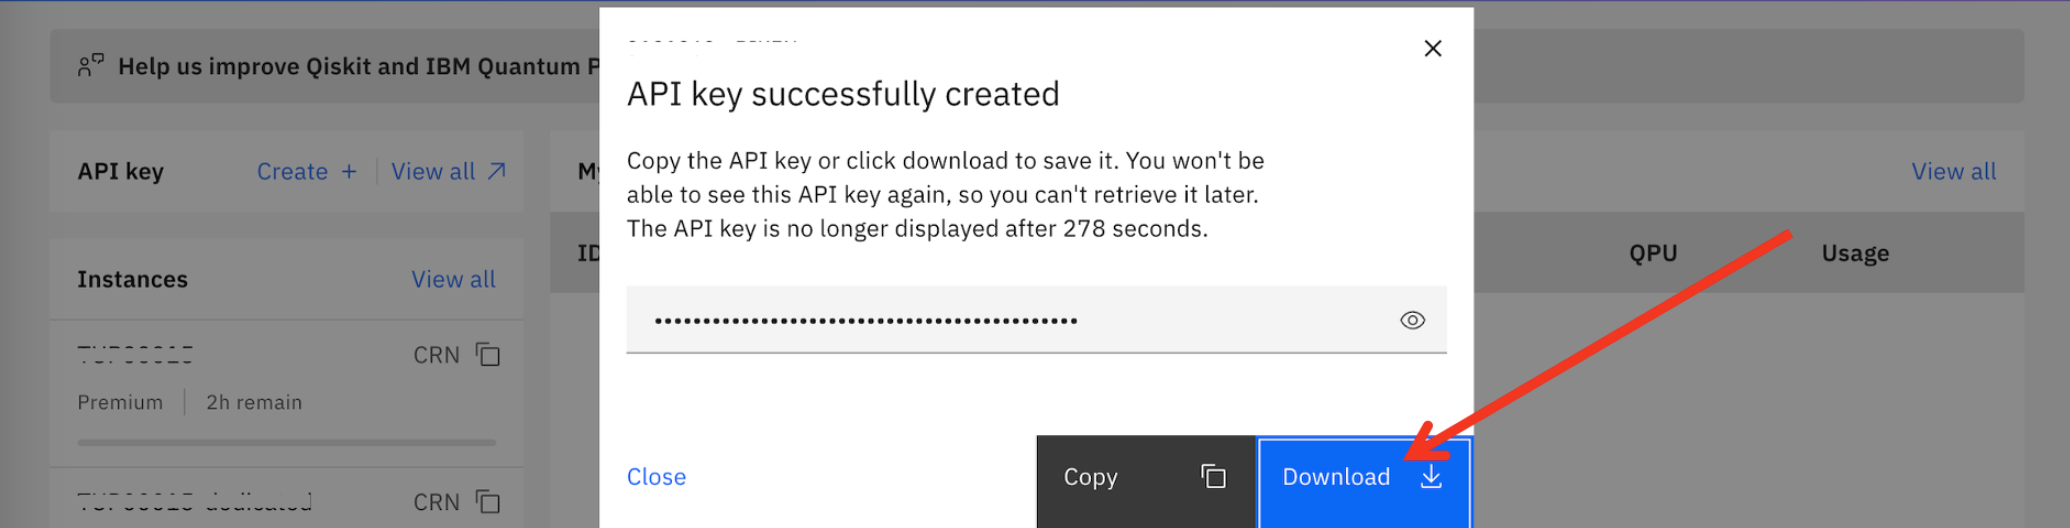

4. Copy the apikey from the "apikey.json" file you saved, and overwrite `deleteThisAndPasteYourAPIKeyHere` in the next cell.
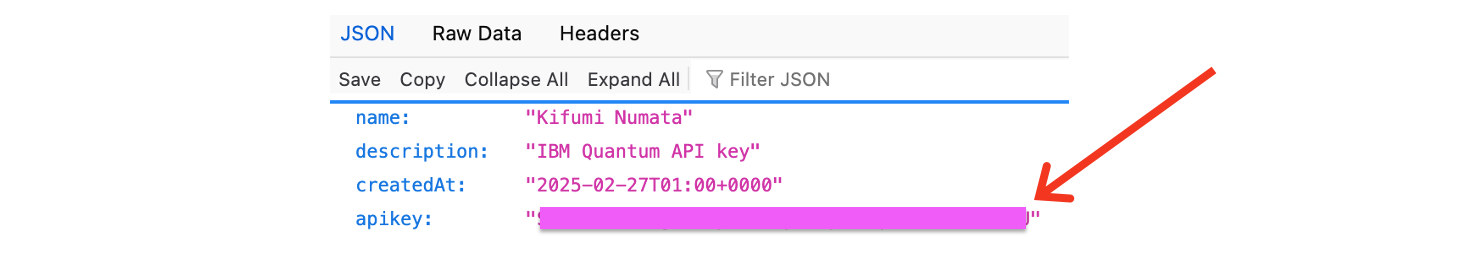

5. Copy the CRN, and overwrite `deleteThisAndPasteYourCRNHere` in the next cell.
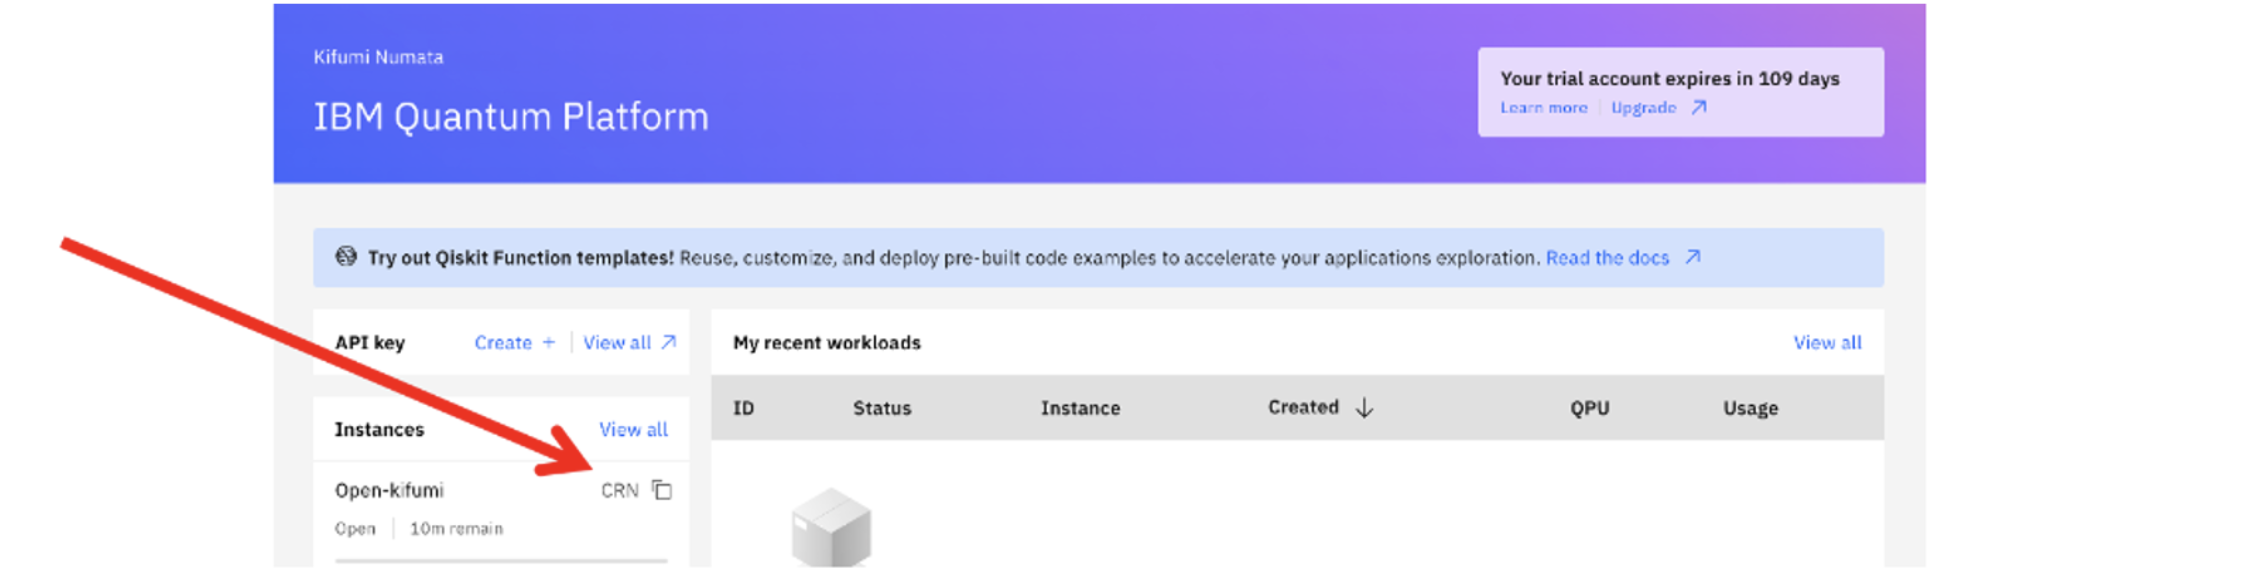

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

your_api_key = "deleteThisAndPasteYourAPIKeyHere"
your_crn = "deleteThisAndPasteYourCRNHere"

service = QiskitRuntimeService.save_account(
    channel="ibm_cloud",
    token=your_api_key, 
    instance=your_crn, 
    set_as_default=True, 
    overwrite=True,
    name="qltp" # please give a name
)

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService(name = "qltp")
service.backends()

## 4. Run on a real quantum device by following Qiskit Patterns

Let us create a Bell state and run it on a real quantum computer;

$$\frac{1}{\sqrt{2}}|00\rangle + \frac{1}{\sqrt{2}}|11\rangle$$

Now we will follow the four steps to writing a quantum program, called Qiskit Patterns:

    1. Map the problem to a quantum-native format
    2. Optimize the circuits
    3. Execute the target circuit
    4. Postprocess the results





### Step 1. Map the problem to a quantum-native format

The following code cell creates a circuit that produces a Bell state, which is a specific two-qubit entangled state. We should add the measurement gates to measure the result of quantum circuit.

In [ ]:
qc = QuantumCircuit(2, 2)

qc.h(0)
qc.cx(0, 1)

qc.measure(0, 0)
qc.measure(1, 1)

qc.draw("mpl")

### Step 2. Optimize the circuits and operators

Qiskit converts abstract circuits to QISA (Quantum Instruction Set Architecture) circuits that respect the constraints of the target hardware and optimizes circuit performance.  Before the optimization, we will specify the target hardware.


In [ ]:
#You can identify the least busy device
backend = service.least_busy(operational=True)
print("The least busy device is ", backend)

In [ ]:
# You can also specifiy the device
backend = service.backend('ibm_kingston')

Different devices may have different coupling maps. And, different quantum computers may have different native gates (gates the hardware can execute). Please refer Compute resources here: https://quantum.cloud.ibm.com/computers

Transpiling the circuit is to compile the circuit optimized for execution on a real machine backend. For more on transpilation, see this [documentation](https://quantum.cloud.ibm.com/docs/en/api/qiskit/transpiler).

In [ ]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Transpile the circuit into basis gates executable on the hardware
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
target_circuit = pm.run(qc)

target_circuit.draw("mpl", idle_wires=False)

By transpiling the circuit, it was converted to a circuit using the native basis gates of the device. 

### Step 3. Execute the target circuit

Now, we will run the target circuit on the real device.

In [ ]:
sampler = Sampler(backend)
job_real = sampler.run([target_circuit])

print("job id:", job_real.job_id())

Execution on the real device will be done in sequence, so the job_id is used to check the execution status and results of the job later.

In [ ]:
# Check the job status
job_real.status()

You can also check the job status from your IBM Quantum Dashboard：https://quantum.cloud.ibm.com/workloads

In [ ]:
# If the Notebook session got disconnected you can also check your job statuse by running the following code
from qiskit_ibm_runtime import QiskitRuntimeService
# for Google Colab users
#service = QiskitRuntimeService(channel='ibm_quantum',instance='ibm-q/open/main',token='<IBM Quantum API key>')
# for local Qiskit users
service = QiskitRuntimeService(name="premium")
job_real = service.job('d469ohhme48c73d7vibg') # Input your job-id between the quotations
job_real.status()

In [ ]:
# Execute after 'DONE' has been appeared
result_real = job_real.result()
print(result_real[0].data.c.get_counts())

### Step 4. Postprocess the results

Finally, we must post-process our results to create outputs in the expected format like values or graphs.

In [ ]:
plot_histogram(result_real[0].data.c.get_counts())

As you can see, $|00\rangle$ and $|11\rangle$ are the most frequently observed. There are a few results other than the expected data, and they are due to noise and qubit decoherence. 

## Exercise 2

Build the circuits that output the following quantum state.

(1) $\frac{1}{4}(|0000\rangle+|0001\rangle+|0010\rangle+|0011\rangle+ \dots+|1111\rangle)$

(2) $\frac{1}{\sqrt{2}}(|01\rangle+|10\rangle)$

In [ ]:
# (1)
##your code goes here##




print(Statevector(qc))
qc.draw("mpl")

In [ ]:
qc.measure_all()

# Run the circuit on a simulator to get the results
backend = AerSimulator()
sampler = Sampler(backend)
job = sampler.run([qc])
result = job.result()

# Print the results
counts = result[0].data.meas.get_counts()
print(counts)

# Plot the counts in a histogram
plot_histogram(counts)

In [ ]:
# (2)
##your code goes here##





print(Statevector(qc))
qc.draw("mpl")

In [ ]:
qc.measure_all()

# Run the circuit on a simulator to get the results
backend = AerSimulator()
sampler = Sampler(backend)
job = sampler.run([qc])
result = job.result()

# Print the results
counts = result[0].data.meas.get_counts()
print(counts)

# Plot the counts in a histogram
plot_histogram(counts)

## 5. GHZ state

The concept of entanglement can be extended to systems of more than two qubits. The GHZ state (Greenberger-Horne-Zeilinger state) is a maximally entangled state of three or more qubits. The GHZ state for three qubits is defined as
$$
\frac{1}{\sqrt 2}(|000\rangle + |111\rangle)
$$
It can be created with the following quantum circuit.

In [ ]:
qc = QuantumCircuit(3, 3)
 
qc.h(0)
qc.cx(0, 1)
qc.cx(1, 2)
 
qc.measure(0, 0)
qc.measure(1, 1)
qc.measure(2, 2)
 
qc.draw("mpl")

The "depth" of a quantum circuit is a useful and common metric to describe quantum circuits. Trace a path through the quantum circuit, moving left to right, only changing qubits when they are connected by a multi-qubit gate. Count the number of gates along that path. The maximum number of gates for any such path through a circuit is the depth. In modern noisy quantum computers, low-depth circuits have fewer errors and are likely to return good results. Very deep circuits are not.

Using `QuantumCircuit.depth()`, we can check the depth of our quantum circuit. The depth of the above circuit is 4. The top qubit has only three gates including the measurement. But there is a path from the top qubit down to either qubit 1 or qubit 2 which involves another CNOT gate.

In [ ]:
qc.depth()

For example: the depthsin the circuits below are 4, 3, and 3 from left to right.

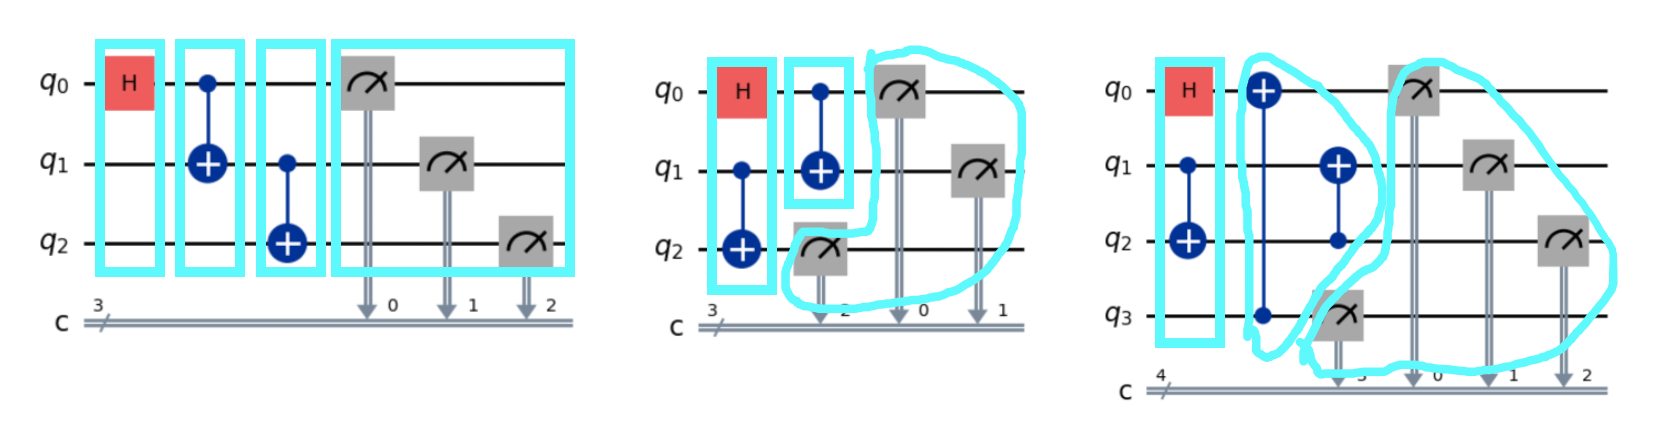

## Exercise 3
The GHZ state of an 8-qubit system is

$$
\frac{1}{\sqrt 2}(|00000000\rangle + |11111111\rangle)
$$

Write code to prepare this state with the shallowest possible circuit. The depth of the shallowest quantum circuit is 5, including the measurement gates.

In [ ]:
# Step 1
qc = QuantumCircuit(8, 8)

##your code goes here##







####

qc.barrier()  # for visual separation

# measure
for i in range(8):
    qc.measure(i, i)

qc.draw("mpl")
# print(qc.depth())

In [ ]:
print(qc.depth())

In [ ]:
from qiskit.visualization import plot_histogram
# Step 2
# For this exercise, the circuit and operators are simple, so no optimizations are needed.
 
# Step 3
# Run the circuit on a simulator to get the results
backend = AerSimulator()
 
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_qc = pm.run(qc)
 
sampler = Sampler(mode=backend)
job = sampler.run([isa_qc], shots=1024)
result = job.result()
 
counts = result[0].data.c.get_counts()
print(counts)
 
# Step 4
# Plot the counts in a histogram
 
plot_histogram(counts)

© IBM Corp., 2025